In [1]:
from ast import increment_lineno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
Airbnb_df = pd.read_csv('Airbnb_data.csv')

In [4]:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
Airbnb_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
price,149,225,150,89,80,200,60,79,79,150


In [9]:
rename_col = {
    'id':'listing_id',
    'name':'listing_name',
    'number_of_reviews':'total_reviews',
    'calculated_host_listings_count':'host_listings_count'
}

In [10]:
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [11]:
Airbnb_df.shape

(48895, 16)

In [13]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [14]:
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [19]:
Airbnb_df.isna().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [20]:
Airbnb_df['listing_name'].fillna('unknown', inplace=True)
Airbnb_df['host_name'].fillna('no_name', inplace=True)

In [22]:
Airbnb_df.isna().sum()

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [23]:
Airbnb_df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [24]:
Airbnb_df.drop(['last_review'], axis=1, inplace=True)

In [25]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [27]:
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace = np.nan, value = 0).astype("int64")

In [29]:
Airbnb_df.isna().sum()

listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [31]:
Airbnb_df['listing_id'].nunique() == Airbnb_df.shape[0]

True

In [36]:
Airbnb_df['neighbourhood'].nunique()

221

In [37]:
Airbnb_df['host_name'].nunique()

11453

In [41]:
Airbnb_df[Airbnb_df['host_name']=='David']['listing_name'].nunique()

402

Thus, david has 402 properties

In [43]:
Airbnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
total_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,8.062583e-01,1.502767e+00,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


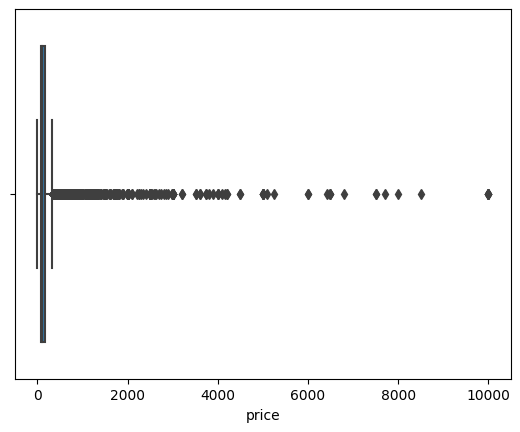

In [45]:
sns.boxplot(x = Airbnb_df['price'])
plt.show()

The data is positively skewed

In [46]:
def iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3-q1
    lb = q1-(1.5*iqr)
    up = q3+(1.5*iqr)
    return lb, up

In [52]:
lb, ub = iqr(Airbnb_df['price'])
Airbnb_df_price = Airbnb_df[(Airbnb_df['price']>lb)&(Airbnb_df['price']<ub)]

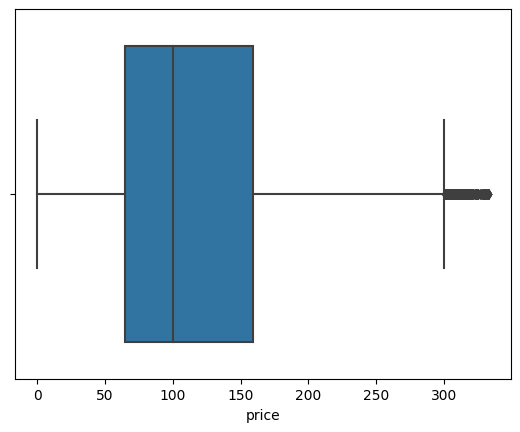

In [53]:
sns.boxplot(x=Airbnb_df_price['price'])
plt.show()

In [54]:
ub

334.0

In [55]:
lb

-90.0

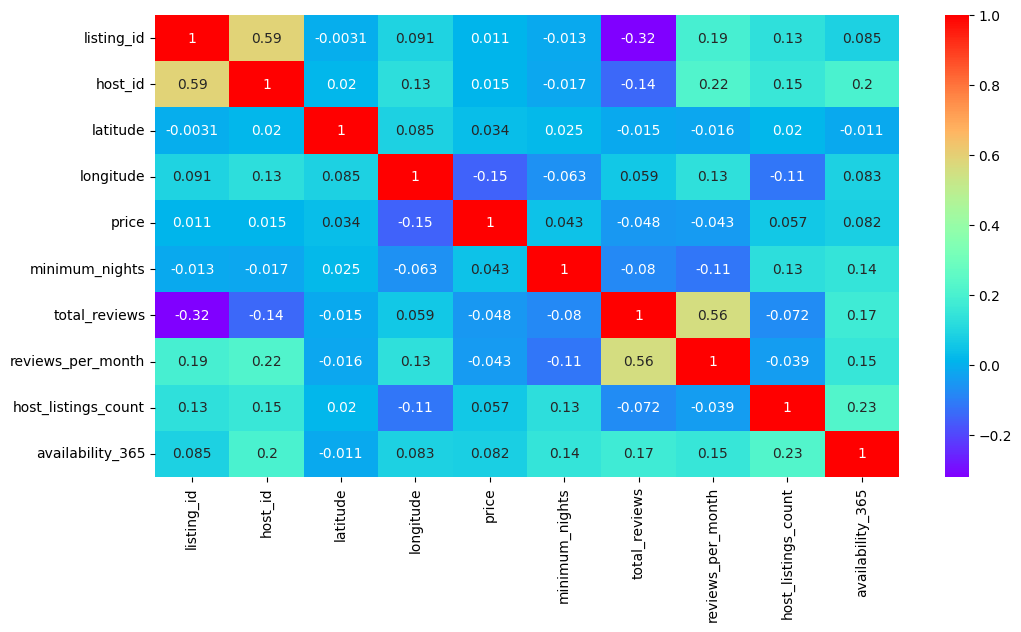

In [56]:
# Actual Analysis
# Correlation Analysis
corr = Airbnb_df.corr() # calculate the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap = 'rainbow', annot = True)
plt.show()

In [63]:
print(Airbnb_df['price'].mean())
print(Airbnb_df['price'].median())
print(Airbnb_df['price'].std())


152.7206871868289
106.0
240.15416974718758


In [65]:
Airbnb_df_price.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'total_reviews',
       'reviews_per_month', 'host_listings_count', 'availability_365'],
      dtype='object')

In [67]:
summary = Airbnb_df.groupby('room_type')['price'].agg([np.mean, np.median, np.std])
summary

,mean,median,std
room_type,,,
Entire home/apt,211.794246,160.0,284.041611
Private room,89.780973,70.0,160.205262
Shared room,70.127586,45.0,101.725252


<AxesSubplot: xlabel='price', ylabel='Density'>

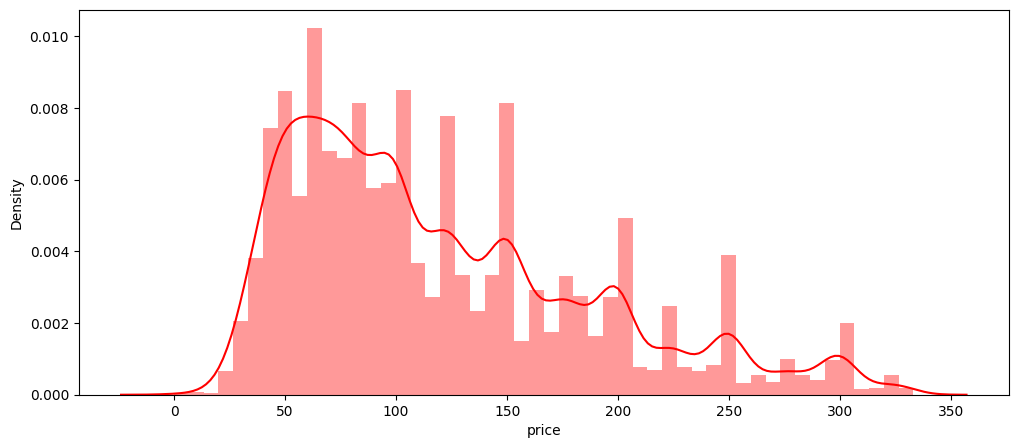

In [68]:
plt.figure(figsize=(12,5))
sns.distplot(Airbnb_df_price['price'], color=('r'))

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

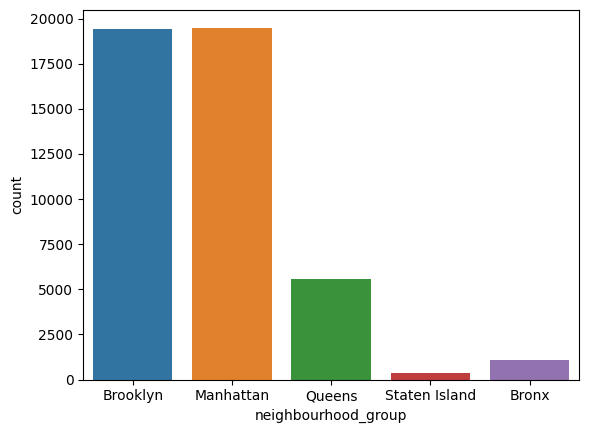

In [73]:
sns.countplot(data=Airbnb_df, x='neighbourhood_group')

<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

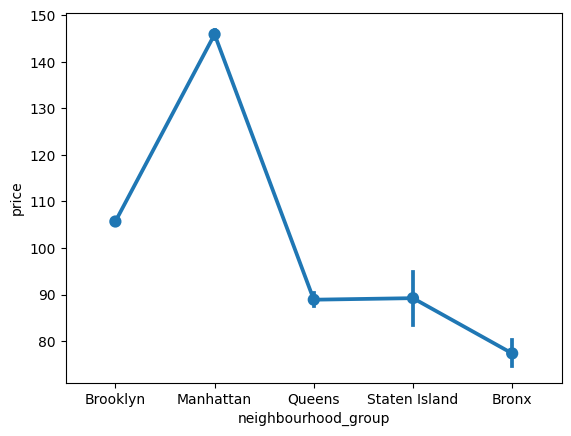

In [75]:
sns.pointplot(data=Airbnb_df_price, x='neighbourhood_group', y='price', estimator = np.mean)

<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

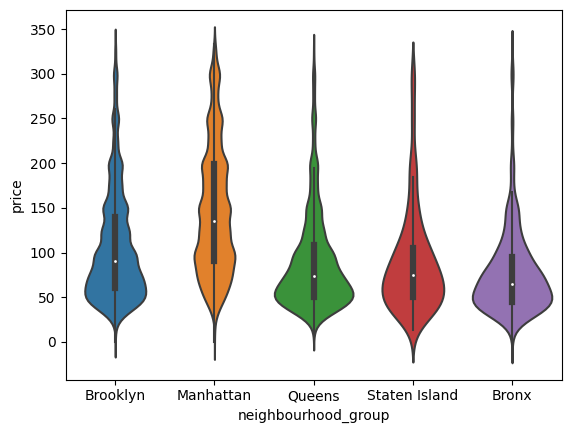

In [76]:
sns.violinplot(data=Airbnb_df_price, x='neighbourhood_group', y='price')

<AxesSubplot: >

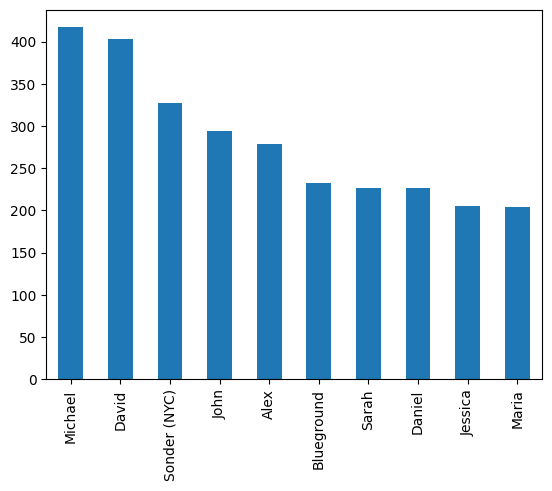

In [81]:
Airbnb_df['host_name'].value_counts()[:10].plot(kind='bar')

<AxesSubplot: >

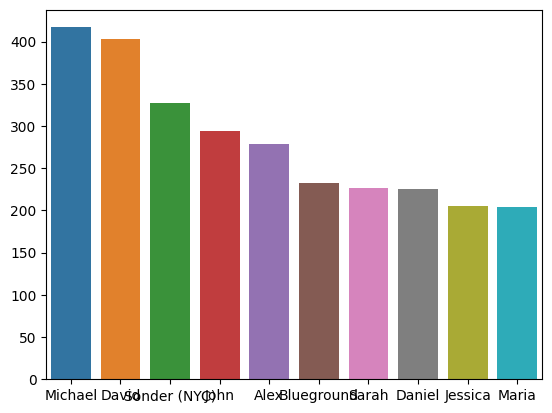

In [83]:
top_host_names = Airbnb_df['host_name'].value_counts()[:10]
sns.barplot(x=top_host_names.index, y=top_host_names.values)


<AxesSubplot: >

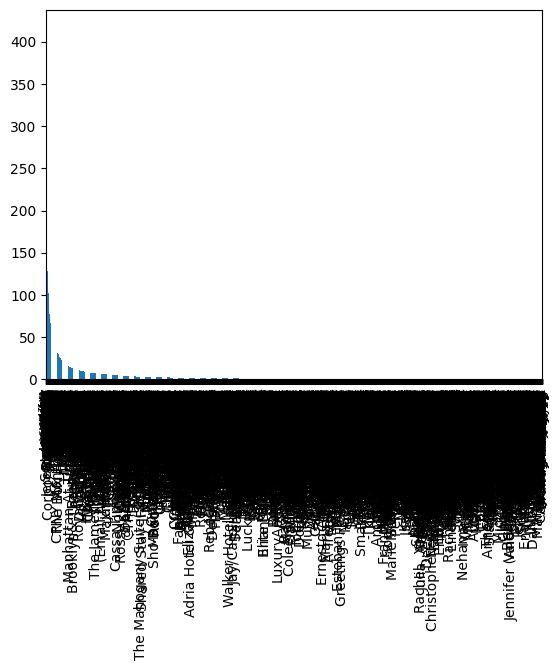

In [84]:
Airbnb_df['host_name'].value_counts().plot(kind='bar')

''' Business Conclusion
1. Manhattan and Brooklyn have highest demand.
2. Brooklyn as compared to Manhattan has cheaper price
3. Data Suggests that Airbnb rentals are used for short stays
4. Majority of Listing are having entire home or private rooms -- good option to chooose'''